## Change Log
### Monday 3-25 - Added bin for radius
### Wednesday 3-27 - Removed non-essential for main program

In [12]:
#Sample usage of the program:
#`IMPORT DATA
from config import api_key
import json
import pprint
import requests
import sys
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

#load CSV File
city_file = "2018happycityrating.csv"
bar_file = "bars_data.csv"
weed_file = "weed_data.csv"

# Read file
happy_cities = pd.read_csv(city_file)
bar_cities = pd.read_csv(bar_file)
weed_cities = pd.read_csv(weed_file)
#happy_cities = happy_cities.rename(columns={"City/State": "Location"})

In [24]:
#Creating Summary DF for Bar Data  and Weed Data by City
bar_cities_group = bar_cities.groupby('City')
cities_rating_avg = bar_cities_group['Rating'].mean()
city_review_count = bar_cities_group['Review Count'].sum()
city_bar_count = bar_cities_group['Name'].count()

bar_summary = pd.DataFrame({"Bars Average Yelp Rating":cities_rating_avg, "Bars Count of Reviews":city_review_count, 
                            "Bar Count":city_bar_count})


#Creating Summary DF for Weed Data by City
weed_cities_group = weed_cities.groupby('City')
wcities_rating_avg = weed_cities_group['Rating'].mean()
wcity_review_count = weed_cities_group['Review Count'].sum()
wcity_bar_count = weed_cities_group['Name'].count()
weed_summary = pd.DataFrame({"Cannabis Shop Average Yelp Rating":wcities_rating_avg, "Cannabis Shop Count of Reviews":wcity_review_count, 
                            "Cannabis Shop Count":wcity_bar_count})
weed_summary.head()


,Cannabis Shop Average Yelp Rating,Cannabis Shop Count of Reviews,Cannabis Shop Count
City,,,
Albuquerque,3.625000,62,8
Anaheim,3.500000,168,5
Anchorage,3.884615,80,13
Auburn,4.000000,17,1
Aurora,3.281250,423,16


In [25]:
bar_summary.head()

,Bars Average Yelp Rating,Bars Count of Reviews,Bar Count
City,,,
Aiea,3.500000,1594,6
Akron,3.792683,2258,41
Alameda,4.125000,3851,4
Albuquerque,3.989796,11218,49
Amarillo,3.558824,1028,34


In [26]:
#Merging Happy Cities and Bar Summary
# Merge two dataframes using an outer join
merge_city_bar = pd.merge(happy_cities, bar_summary, on="City", how="left") 
#Merging Happy Cities and Weed Summary
# Merge two dataframes using an outer join
merge_table_final = pd.merge(merge_city_bar, weed_summary, on="City", how="left") 

merge_table_final.to_csv("merge_table_final.csv", encoding="utf-8", index=False)
merge_table_final.head()

,Overall Rank,City,State,City/State,Total Score,Emotional & Physical Well-Being,Income & Employment,Community & Environment,Recreational,Medical,Bars Average Yelp Rating,Bars Count of Reviews,Bar Count,Cannabis Shop Average Yelp Rating,Cannabis Shop Count of Reviews,Cannabis Shop Count
0,1,Plano,TX,"Plano, TX",72.30,7,6,8,illegal,CBD oil,3.928571,16083.0,49.0,NaN,NaN,NaN
1,2,Irvine,CA,"Irvine, CA",71.86,14,11,5,legal,legal,3.810345,22953.0,29.0,5.0,6.0,2.0
2,3,Madison,WI,"Madison, WI",71.81,3,14,7,misdemeanor,CBD oil,4.050000,11387.0,50.0,NaN,NaN,NaN
3,4,Fremont,CA,"Fremont, CA",71.17,10,37,1,legal,legal,3.592593,8745.0,27.0,NaN,NaN,NaN
4,5,Huntington Beach,CA,"Huntington Beach, CA",69.74,6,46,28,legal,legal,4.062500,39297.0,56.0,NaN,NaN,NaN


In [27]:
merge_city_bar.head()

,Overall Rank,City,State,City/State,Total Score,Emotional & Physical Well-Being,Income & Employment,Community & Environment,Recreational,Medical,Bars Average Yelp Rating,Bars Count of Reviews,Bar Count
0,1,Plano,TX,"Plano, TX",72.30,7,6,8,illegal,CBD oil,3.928571,16083.0,49.0
1,2,Irvine,CA,"Irvine, CA",71.86,14,11,5,legal,legal,3.810345,22953.0,29.0
2,3,Madison,WI,"Madison, WI",71.81,3,14,7,misdemeanor,CBD oil,4.050000,11387.0,50.0
3,4,Fremont,CA,"Fremont, CA",71.17,10,37,1,legal,legal,3.592593,8745.0,27.0
4,5,Huntington Beach,CA,"Huntington Beach, CA",69.74,6,46,28,legal,legal,4.062500,39297.0,56.0


# ## Combine detail files and bin for radius

In [28]:
merge_city_bar_det = bar_cities.append(weed_cities, ignore_index=True)
merge_city_bar_det = pd.DataFrame(merge_city_bar_det)
bins = [0, 4023, 8046, 12070, 17000]
group_radius = ["2.5 Mile Radius", "5 Mile Radius", "7.5 Mile Radius", "10 Mile Radius"]

merge_city_bar_det['Top-Bottom'] = pd.cut(merge_city_bar_det["Distance"], bins, labels=group_radius)
merge_city_bar_det.to_csv("merge_city_bar_det.csv", encoding="utf-8", index=False)
merge_city_bar_det.head()

,Address,Category 0,Category 1,Category 2,Category 3,City,Distance,Name,Out of Business,Price,Rating,Review Count,State,Top-Bottom
0,3701 Dallas Pkwy,American (New),Pizza,Wine Bars,NaN,Plano,7440.286656,Sixty Vines,False,$$,4.5,966,TX,5 Mile Radius
1,5880 TX-121,Breakfast & Brunch,Bars,American (Traditional),NaN,Plano,6904.114484,The Biscuit Bar,False,$,4.5,580,TX,5 Mile Radius
2,7300 Lone Star Dr,American (New),Wine Bars,Seafood,NaN,Plano,6644.335931,Seasons 52,False,$$$,4.0,717,TX,5 Mile Radius
3,7300 Dallas Pkwy,Steakhouses,Seafood,Wine Bars,NaN,Plano,6692.595554,The Capital Grille,False,$$$,4.5,479,TX,5 Mile Radius
4,1006 E 15th St,Pizza,Lounges,Italian,NaN,Plano,7076.169644,Urban Crust,False,$$,4.0,865,TX,5 Mile Radius


# ## Merge top and bottom 15

In [29]:
top_10 = merge_table_final.nlargest(15,'Total Score')
bot_10 = merge_table_final.nsmallest(15,'Total Score')
top_bot = top_10.append(bot_10, ignore_index=True)
bins = [0,50,75]
group_top_bot = ["Bottom 15 Cities", "Top 15 Cities"]
top_bot["Top 15 Bottom 15"] = pd.cut(top_bot["Total Score"], bins, labels=group_top_bot)
top_bot.to_csv("top_bot.csv", encoding="utf-8", index=False)
top_bot

,Overall Rank,City,State,City/State,Total Score,Emotional & Physical Well-Being,Income & Employment,Community & Environment,Recreational,Medical,Bars Average Yelp Rating,Bars Count of Reviews,Bar Count,Cannabis Shop Average Yelp Rating,Cannabis Shop Count of Reviews,Cannabis Shop Count,Top 15 Bottom 15
0,1,Plano,TX,"Plano, TX",72.30,7,6,8,illegal,CBD oil,3.928571,16083.0,49.0,NaN,NaN,NaN,Top 15 Cities
1,2,Irvine,CA,"Irvine, CA",71.86,14,11,5,legal,legal,3.810345,22953.0,29.0,5.0000,6.0,2.0,Top 15 Cities
2,3,Madison,WI,"Madison, WI",71.81,3,14,7,misdemeanor,CBD oil,4.050000,11387.0,50.0,NaN,NaN,NaN,Top 15 Cities
3,4,Fremont,CA,"Fremont, CA",71.17,10,37,1,legal,legal,3.592593,8745.0,27.0,NaN,NaN,NaN,Top 15 Cities
4,5,Huntington Beach,CA,"Huntington Beach, CA",69.74,6,46,28,legal,legal,4.062500,39297.0,56.0,NaN,NaN,NaN,Top 15 Cities
5,6,Fargo,ND,"Fargo, ND",69.57,17,20,24,illegal,legal,3.824324,1893.0,37.0,NaN,NaN,NaN,Top 15 Cities
6,7,Grand Prairie,TX,"Grand Prairie, TX",69.30,20,35,6,illegal,CBD oil,3.361111,2684.0,18.0,NaN,NaN,NaN,Top 15 Cities
7,8,San Jose,CA,"San Jose, CA",68.90,1,18,44,legal,legal,3.820000,48780.0,50.0,3.8125,690.0,8.0,Top 15 Cities
8,9,Scottsdale,AZ,"Scottsdale, AZ",68.24,46,13,2,Illegal,legal,4.084906,22274.0,53.0,3.5000,32.0,1.0,Top 15 Cities
9,10,San Francisco,CA,"San Francisco, CA",67.53,4,2,125,legal,legal,4.130000,113196.0,50.0,4.3000,1173.0,15.0,Top 15 Cities


# ## Create Data Frame for Bar Summary

In [30]:
bar_topbot_group = top_bot.groupby('Top 15 Bottom 15')
rating_avg = bar_topbot_group['Bars Average Yelp Rating'].mean()
review_count = bar_topbot_group['Bars Count of Reviews'].sum()
bar_count = bar_topbot_group['Bar Count'].sum()
summary = pd.DataFrame({"Average Yelp Rating":rating_avg, "Count of Reviews":review_count, 
                            "Bar Count":bar_count})

summary["Average Yelp Rating"] = summary["Average Yelp Rating"].map("{:.2f}".format)
summary["Count of Reviews"] = summary["Count of Reviews"].map("{:,.2f}".format)
summary["Bar Count"] = summary["Bar Count"].map("{:,.2f}".format)

Weed_df = pd.DataFrame(top_bot[['Top 15 Bottom 15','Total Score','City/State', 'Recreational', 'Medical', 
                                'Cannabis Shop Average Yelp Rating','Cannabis Shop Count of Reviews',
                                'Cannabis Shop Count']])

Weed_df['Recreational'] = Weed_df['Recreational'].replace(
    {'illegal': 'Illegal', 'legal': 'Legal', 'misdemeanor': 'Misdemeanor', 'decriminalized': 'Decriminalized' })

Weed_df['Medical'] = Weed_df['Medical'].replace(
    {'illegal': 'Illegal','CBD oil': 'CBD Oil Legal', 'legal': 'Legal', 'misdemeanor': 'Misdemeanor', 'decriminalized': 'Decriminalized' })
summary.head()


,Average Yelp Rating,Count of Reviews,Bar Count
Top 15 Bottom 15,,,
Bottom 15 Cities,3.88,"124,045.00",637.00
Top 15 Cities,3.84,"347,152.00",610.00


# ## Create Data Frame for Weed Summary

In [31]:
Weed_df.head()

,Top 15 Bottom 15,Total Score,City/State,Recreational,Medical,Cannabis Shop Average Yelp Rating,Cannabis Shop Count of Reviews,Cannabis Shop Count
0,Top 15 Cities,72.30,"Plano, TX",Illegal,CBD Oil Legal,NaN,NaN,NaN
1,Top 15 Cities,71.86,"Irvine, CA",Legal,Legal,5.0,6.0,2.0
2,Top 15 Cities,71.81,"Madison, WI",Misdemeanor,CBD Oil Legal,NaN,NaN,NaN
3,Top 15 Cities,71.17,"Fremont, CA",Legal,Legal,NaN,NaN,NaN
4,Top 15 Cities,69.74,"Huntington Beach, CA",Legal,Legal,NaN,NaN,NaN


In [32]:
Weed_df_group = Weed_df.groupby('Recreational')
Weed_rec_group = Weed_df_group ['Recreational'].count()
Weed_df_group2 = Weed_df.groupby('Medical')
Weed_med_group = Weed_df_group2 ['Medical'].count()

Weed_rec_group, Weed_med_group 

(Recreational
 Decriminalized    7
 Illegal           9
 Legal             7
 Misdemeanor       7
 Name: Recreational, dtype: int64, Medical
 CBD Oil Legal     7
 Illegal           3
 Legal            20
 Name: Medical, dtype: int64)

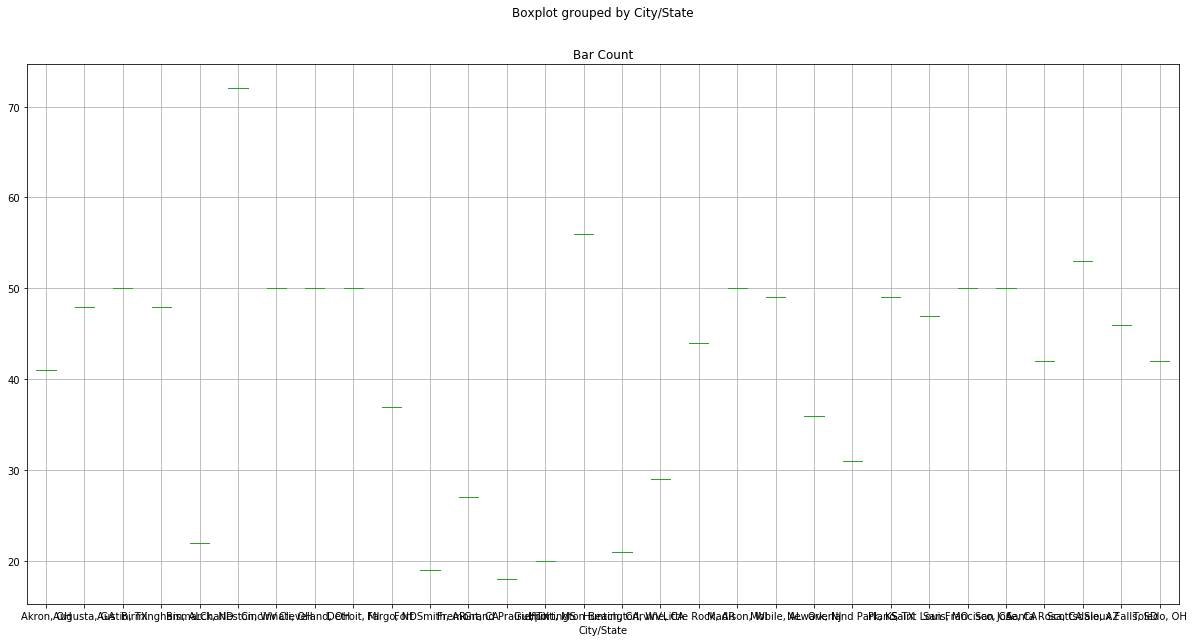

In [33]:
top_bot.boxplot("Bar Count", by="City/State", figsize=(20, 10))

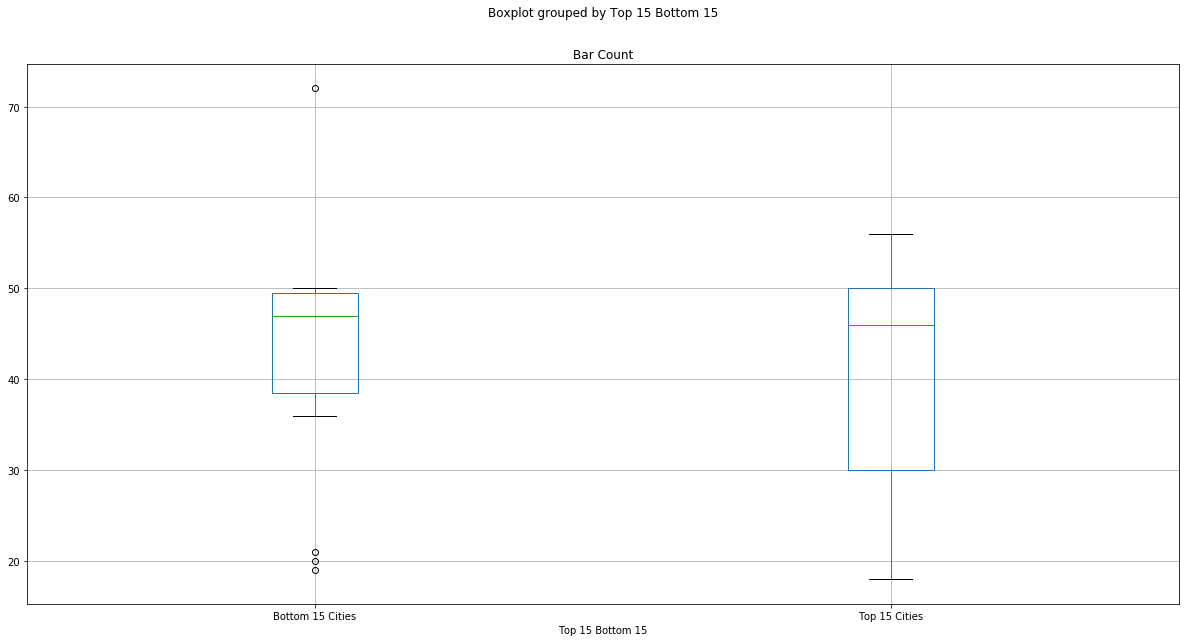

<Figure size 864x648 with 0 Axes>

In [35]:
top_bot.boxplot("Bar Count", by="Top 15 Bottom 15", figsize=(20, 10))
plt.show()
plt.savefig('bars_box.png')

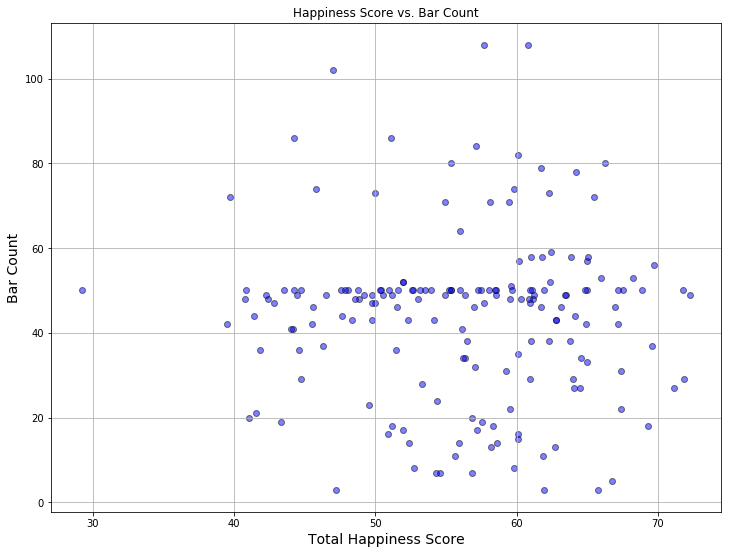

<Figure size 864x648 with 0 Axes>

In [23]:
#set Plotting variables
x = merge_table_final['Total Score']
y = merge_table_final['Bar Count']
#s = merge_table_final['Bars Average Yelp Rating']*100
c = "blue"
edgecolors = 'black'

#size the graph
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

#add grid
plt.grid(True)
#Add Text
plt.title ('Happiness Score vs. Bar Count')
plt.xlabel('Total Happiness Score', fontsize = 14)
plt.ylabel('Bar Count', fontsize = 14)
#plt.text(30,250,'Circle size represents population size', fontsize = 15)
#plt.text(47,-40,'Source: wallethub.com')
#plt.text(23,175, "Source: governing.com", rotation = 90)
#Showing most and least happy cities

#plot graph
plt.scatter(x,y,c=c,edgecolors=edgecolors,alpha = 0.5)
plt.show()
plt.savefig('bars_scatter.png')